In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.DataFrame(pd.read_csv('/content/AAPL_1D_01012007-12072023.csv'))
df

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578
...,...,...,...,...,...,...,...,...
4154,4.515552e+07,190.8214,189.8400,191.8100,192.0200,189.2000,1688616000,562755
4155,4.675750e+07,191.4218,191.4100,190.6800,192.6700,190.2400,1688702400,538826
4156,5.991216e+07,188.3628,189.2600,188.6100,189.9900,187.0350,1688961600,736912
4157,4.663812e+07,187.8219,189.1600,188.0800,189.3000,186.6000,1689048000,577717


In [ ]:
import datetime

df['readable_time'] = df['time'].apply(lambda x: datetime.datetime.utcfromtimestamp(x))
df['Month'] = df['readable_time'].dt.month
df['Year'] = df['readable_time'].dt.year

In [76]:
df['volume'] = df['volume'] / 1000000

In [143]:
df

,volume,vwap,open,close,high,low,time,transactions,readable_time,Month,Year
0,1245.444592,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737,2007-01-03 05:00:00,1,2007
1,855.483384,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333,2007-01-04 05:00:00,1,2007
2,835.258032,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050,2007-01-05 05:00:00,1,2007
3,797.413848,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547,2007-01-08 05:00:00,1,2007
4,3352.006588,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578,2007-01-09 05:00:00,1,2007
...,...,...,...,...,...,...,...,...,...,...,...
4154,45.155523,190.8214,189.8400,191.8100,192.0200,189.2000,1688616000,562755,2023-07-06 04:00:00,7,2023
4155,46.757498,191.4218,191.4100,190.6800,192.6700,190.2400,1688702400,538826,2023-07-07 04:00:00,7,2023
4156,59.912163,188.3628,189.2600,188.6100,189.9900,187.0350,1688961600,736912,2023-07-10 04:00:00,7,2023
4157,46.638119,187.8219,189.1600,188.0800,189.3000,186.6000,1689048000,577717,2023-07-11 04:00:00,7,2023


<Figure size 1600x600 with 0 Axes>

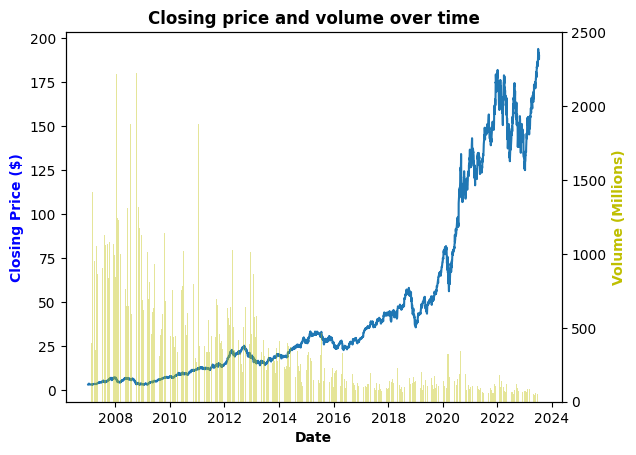

In [85]:
plt.figure(figsize=(16,6))
fig, ax1 = plt.subplots()

ax1.plot(df['readable_time'], df['close'])
ax1.set_title('Closing price and volume over time', fontweight='bold')
ax1.set_xlabel('Date', fontweight='bold')
ax1.set_ylabel('Closing Price ($)', fontweight='bold', color='b')

ax2 = ax1.twinx()

ax2.bar(df['readable_time'],df['volume'], color='y', alpha=0.4)
ax2.set_ylabel('Volume (Millions)', fontweight='bold', color='y')
ax2.set_ylim(0, 2500)
plt.show()

Apple is one of the most successful stocks in the entire world and it, along with several other large US tech companies, largely drive the US stock market, with Apple being ahead of the pack even among this illustrious group that includes Amazon, Alphabet, Microsoft, and Meta. As expected, the longterm trend is positive. I didn't realize that as late as 2020, when the world saw a covid-related tech boom, that it began growing so rapidly. I would have assumed it would have leveled off at high level by then, but it has more than doubled since then.

What's intriguing is the large drop in trading volume over time. Perhaps this is common as companies mature. Because Apple is so large, stable and well-known, high frequency traders may find fewer arbitrage opportunities in short-term swings of the stock. You can see short-term spikes in volume around the beginning of covid in 2020 and another spike later that year. Beyond that, the period from 2017 to 2023 has seen relatively little volume.

In [56]:
import plotly.graph_objs as go
import matplotlib.dates as mdates


trace = go.Candlestick(
    x=df['readable_time'],
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
)

# Create figure and plot
layout = go.Layout(
    title='Candlestick Chart',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
)
fig = go.Figure(data=[trace], layout=layout)
fig.show()

Because the data set spans over so many years, it's hard to make out much more than you see in the prior 'Closing price and volume' graph unless you zoom in on a shorter period of time. Let's break it down by year.

In [43]:
yearly_mean = df.groupby('Year')['volume','transactions',	'vwap'].mean()
yearly_mean = yearly_mean.reset_index()

<ipython-input-43-0dfe4aa4f45c>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [49]:
df_sorted = df.sort_values('readable_time', ascending=True)
open_closing = df_sorted.groupby('Year').agg({'open': 'first', 'close': 'last'})
open_closing = open_closing.reset_index()

In [39]:
yearly_low = df.groupby('Year')['low'].min()
yearly_low = yearly_low.reset_index()

yearly_high = df.groupby('Year')['high'].max()
yearly_high = yearly_high.reset_index()

In [ ]:
hiNlo = pd.merge(yearly_low,yearly_high, on='Year')


In [ ]:
merge = pd.merge(hiNlo,open_closing,on='Year')

In [55]:
groupings = pd.merge(yearly_mean,merge, on='Year')
groupings

,Year,volume,transactions,vwap,low,high,open,close
0,2007,9.854333e+08,165724.147410,4.583000,2.9250,7.2486,3.0821,7.0743
1,2008,1.130935e+09,223379.193676,5.074039,2.8264,7.1521,7.1168,3.0482
2,2009,5.689824e+08,108283.436508,5.243333,2.7929,7.6411,3.0671,7.5261
3,2010,5.990311e+08,118597.912698,9.279007,6.7946,11.6664,7.6225,11.5200
4,2011,4.922560e+08,104471.202381,13.000559,11.0893,15.2393,11.6300,14.4643
5,2012,5.278878e+08,109457.892000,20.575760,14.6071,25.1811,14.6214,19.0062
6,2013,4.064722e+08,84324.492063,16.892484,13.7536,20.5406,19.7793,20.0364
7,2014,2.527564e+08,188315.777778,23.070142,17.6268,29.9375,19.8457,27.5950
8,2015,2.072952e+08,267957.690476,30.018348,23.0000,33.6350,27.8475,26.3150
9,2016,1.536688e+08,213563.011905,26.144205,22.3675,29.6725,25.6525,28.9550


In [59]:
trace = go.Candlestick(
    x=groupings['Year'],
    open=groupings['open'],
    high=groupings['high'],
    low=groupings['low'],
    close=groupings['close'],
)

# Create figure and plot
layout = go.Layout(
    title='Candlestick Chart',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Price'),
)
fig = go.Figure(data=[trace], layout=layout)
fig.show()

Most years, with the exception of 2008, 2015, 2018, and 2022, saw Apple icreasing in price from opening to closing prices. After the 2018 drop due to the global financial crisis, Apple nearly doubled in 2019 (from $38.72 to $73.41 ) then did so again in 2020 ($74.06 to $132.69 ). All of the 2020 gains were reversed in 2021 due to the global recession in light of the Russia-Ukraine war and global inflation for the first time in decades. However, as the global markets recovered in 2023, Apple returned and even exceeded its peak in 2021. We are only 6 months into 2023.

In [102]:
rolling_df = df.set_index('readable_time')

rolling_mean = rolling_df['close'].rolling(window=30).mean()
rolling_std = rolling_df['close'].rolling(window=30).std()

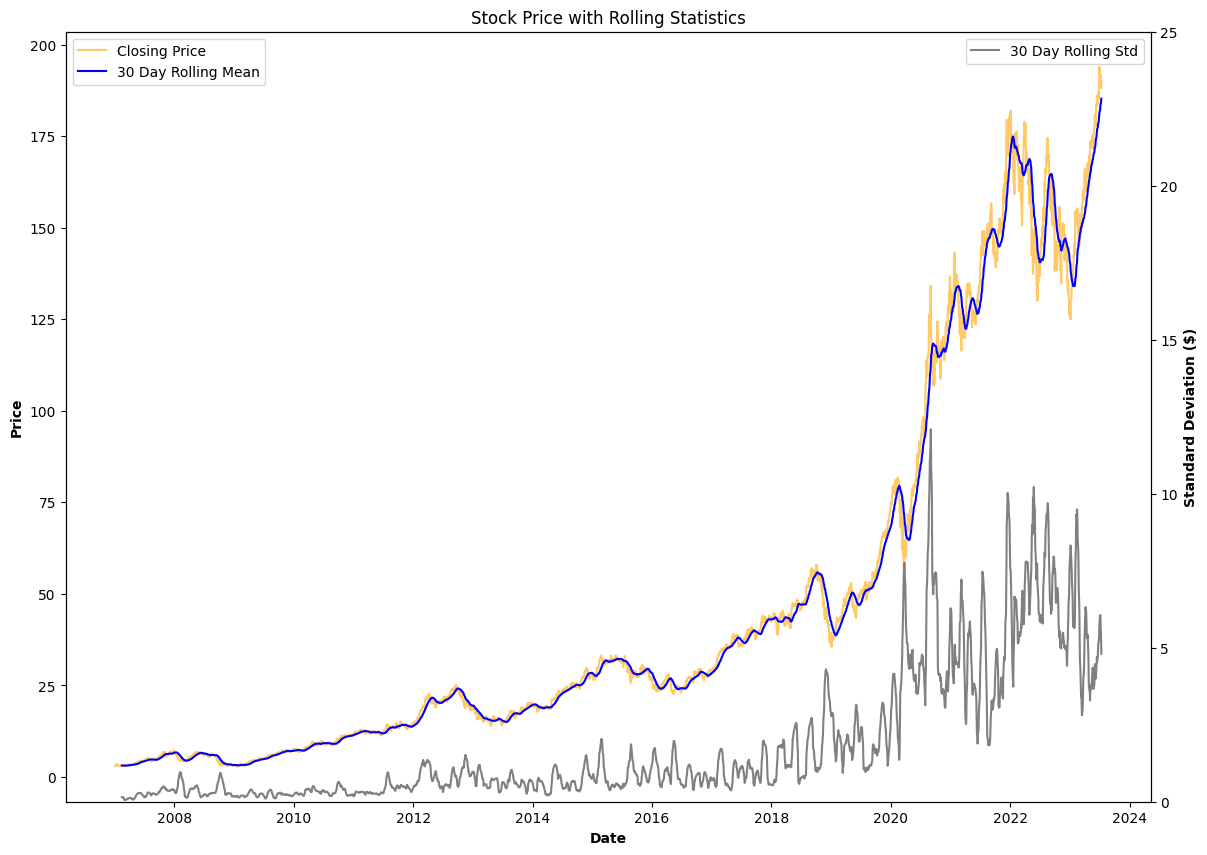

In [221]:
fig, ax1 = plt.subplots(figsize=(14,10))

ax1.plot(rolling_df.index, rolling_df['close'], label='Closing Price', color='orange',alpha=.6)
ax1.plot(rolling_mean, label='30 Day Rolling Mean',color='b')
ax1.set_xlabel('Date',fontweight='bold')
ax1.set_ylabel('Price', fontweight='bold')
plt.title('Stock Price with Rolling Statistics')
plt.legend()
ax2 = ax1.twinx()

ax2.plot(rolling_std, label='30 Day Rolling Std',color='gray')
ax2.set_ylabel('Standard Deviation ($)',fontweight='bold')
ax2.set_ylim(0,25)

plt.legend()
plt.show()

Because the Std is in absolute dollars, it's a little hard to draw conclusions between the first half and second half of the data where the stock price increased dramatically.

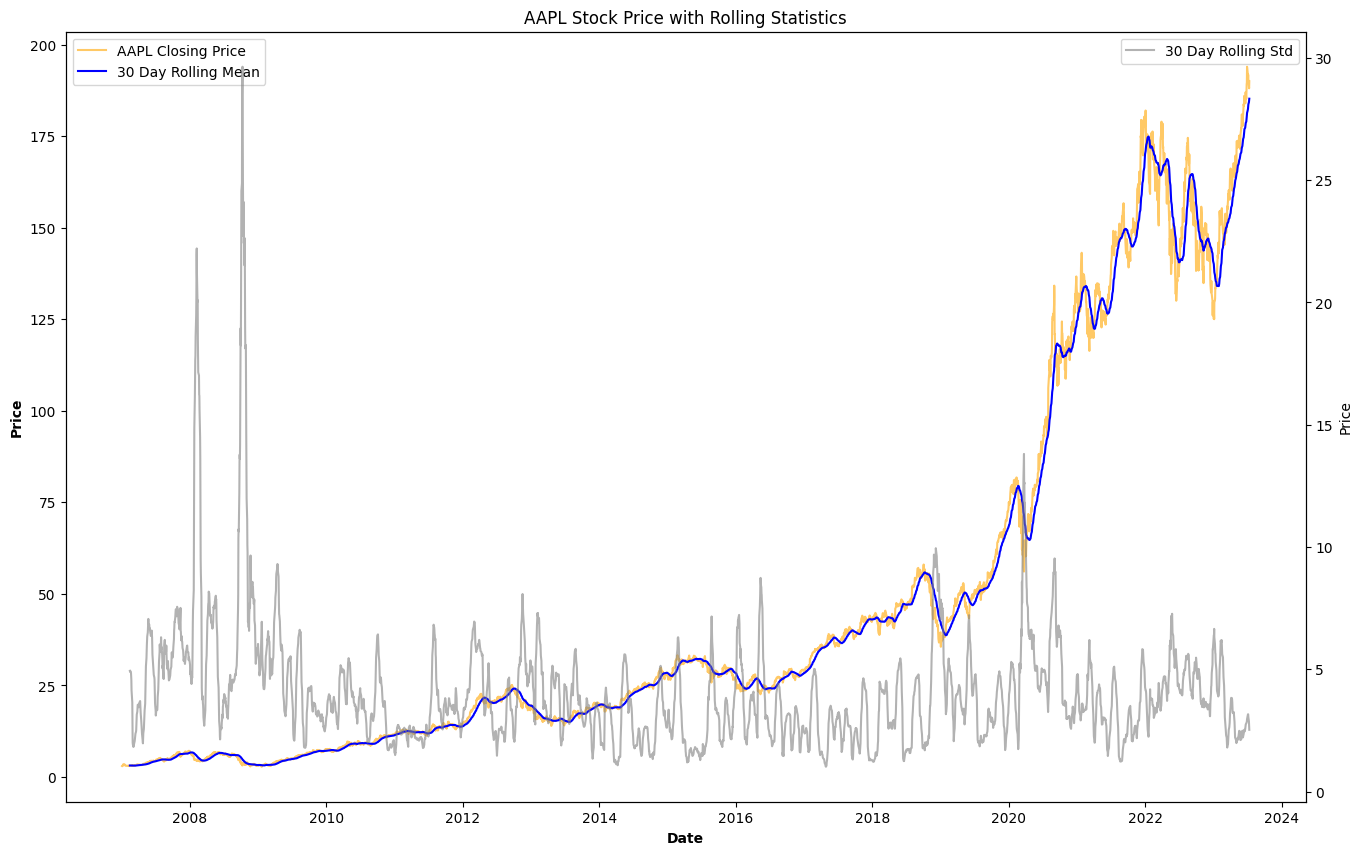

In [106]:
rolling_std_percent = (rolling_std / rolling_df['close']) * 100

fig, ax1 = plt.subplots(figsize=(16,10))

ax1.plot(rolling_df.index, rolling_df['close'], label='AAPL Closing Price', color='orange',alpha=.6)
ax1.plot(rolling_mean, label='30 Day Rolling Mean',color='b')
ax1.set_xlabel('Date',fontweight='bold')
ax1.set_ylabel('Price', fontweight='bold')
plt.title('AAPL Stock Price with Rolling Statistics')
plt.legend()
ax2 = ax1.twinx()

ax2.plot(rolling_std_percent, label='30 Day Rolling Std',color='gray', alpha=.6)


plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

It looks like the volatility of Apple stabilized around 2010. That is also when the company cap size reached astronomic levels, reaching the top 10 companies by cap size in the world for the first time. This could be because smaller companies may be volatile or it can be related to the fallout from the financial crisis in 2008 and 2009. In any case, since 2010, the 30 day standard deviation % change rarely exceeds ~8%. When it does, I don't believe it's usually due to company-specific news, like exceptionally low or high earning reports. It's typically due to macroeconomic conditions that affect the entire stock market. The peak was around Q1 2020, due to a rapid drop and then an increase after the turmoil of the global pandemic.

In [ ]:
df['Daily_Return'] = df['close'].pct_change()

In [190]:
df_nona = df.dropna()

In [202]:
df_nona['Daily_Return'] = df_nona['Daily_Return']*100


<ipython-input-202-bb16cdf8ce13>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



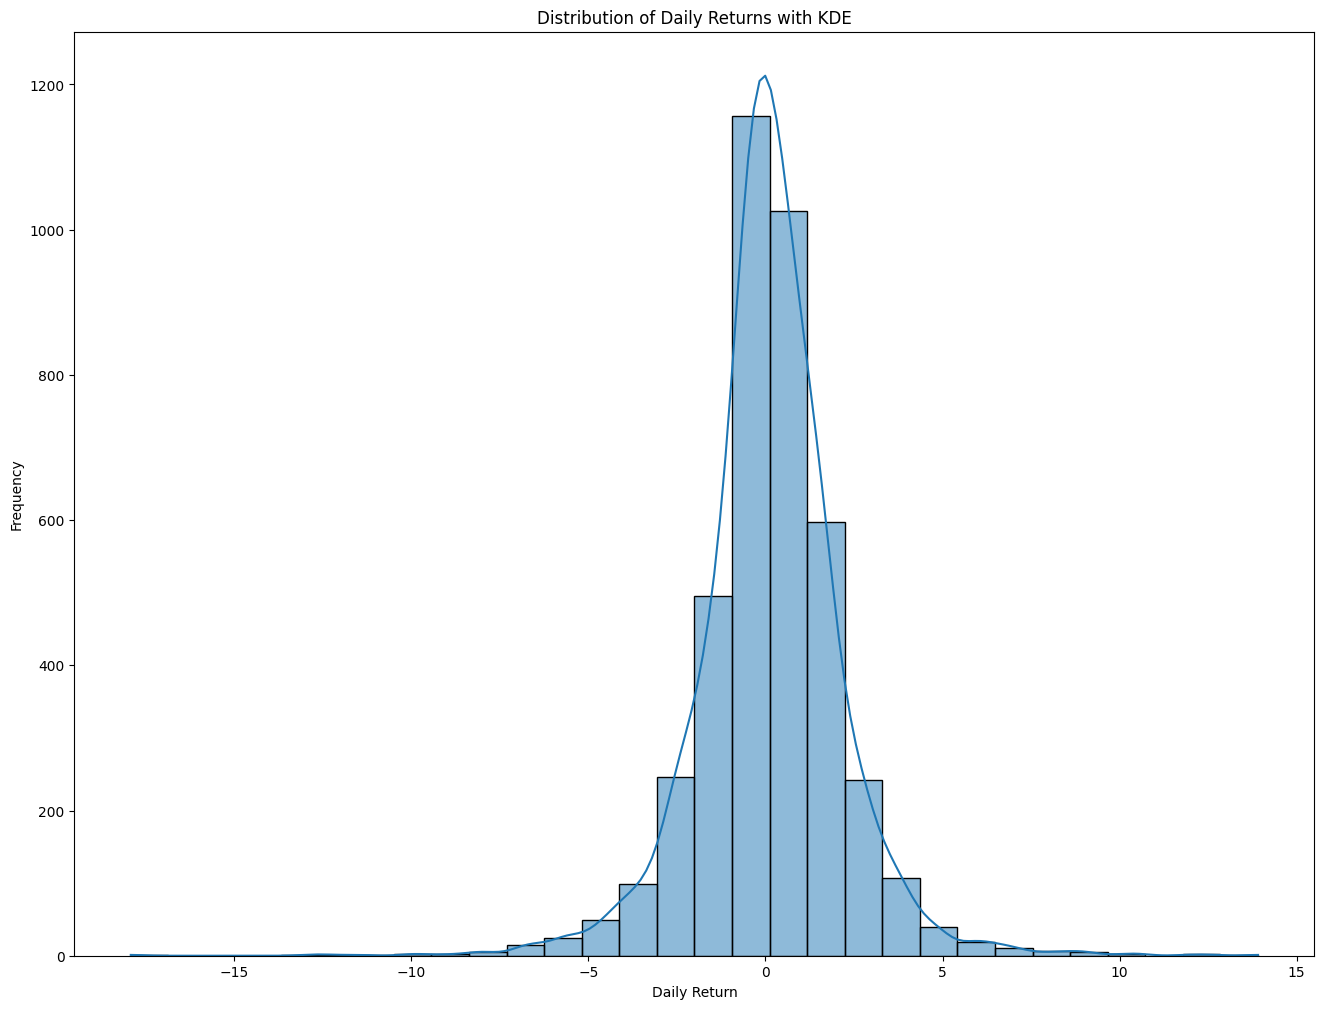

Shapiro-Wilk Test:
Statistic: 0.9406672716140747
P-value: 6.185059009108278e-38


In [214]:
from scipy.stats import shapiro, normaltest

plt.figure(figsize=(16, 12))

sns.histplot(df_nona['Daily_Return'], bins=30, kde=True, alpha=0.5)
plt.title('Distribution of Daily Returns with KDE')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

# Performing Shapiro-Wilk test on the same data
statistic, p_value = shapiro(df_nona['Daily_Return'].dropna())
print(f"Shapiro-Wilk Test:")
print("Statistic:", statistic)
print("P-value:", p_value)


The null hypothesis is that the average daily return is normally distributed, and therefore random. My alt hypothesis is that the distribution should be more positive than negative do to the consistent returns of Apple stocks.

Above is a histogram showing the distribution of daily price changes. The vast majority of daily price changes was from -.05% to .05%.

In addition, the Shapiro-Wilk test tests whether a data set has a normal distribution has a very low p-value, leading one to reject the null hypothesis. However, it's hard to see how this distribution isn't normal. Eyeballing it suggests it is.

In [206]:
skewness = stats.skew(df_nona['Daily_Return'])
print("Skewness coefficient:", skewness)

kurt = df_nona['Daily_Return'].kurtosis()
print("Kurtosis:", kurt)

Skewness coefficient: -0.13554412169193394
Kurtosis: 5.894891448698106


Looking at the skewness and kurtosis, it appears that the distribution is actually negative. This is surprising given the very high return from 2007 to 2023 for Apple stock. It however can be explained by the high Kurtosis. It appears that day to day, Apple stock has a normal to negative distribution. However, large daily spikes result in the stock regaining part of its lost value and adding some on top of it. This somewhat makes sense. When you look at the time-series graphs at the top of the page you see big spikes at various short-term ranges, like early 2020 and 2023. Further, if you look closely at the most recent graph, Distribution of Daily Returns, you see that the bins at and above +10% are more frequent than those at -10%. This supports the idea that a small number of high return days push the overall return up.